In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
dt=pd.read_csv('Information.csv',encoding='ISO-8859-1')

In [ ]:
dt.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
#Attributes that do not provide useful information for Gender classification are dropped
dt.drop(['_unit_id','_last_judgment_at','user_timezone','tweet_coord','tweet_count','tweet_created','tweet_id','tweet_location','profileimage','created'], axis=1, inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  name                   20050 non-null  object 
 12  profile_yn_gold        50 non-null     object 
 13  retweet_count          20050 non-null  int64  
 14  sidebar_color          20050 non-null  object 
 15  te

In [ ]:
dt['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [ ]:
#if gender==unknown drop those columns
drop_items_idx = dt[dt['gender'] == 'unknown'].index
dt.drop(index = drop_items_idx, inplace = True)
dt['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [ ]:
#'No': Profile was meant to be part of the dataset but was not available when contributors went to judge it.
dt[dt['profile_yn'] == 'no']['gender']

109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
        ... 
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [ ]:
#It is shown that all of 97 instances with profile_yn == no are all NaN in gender.
#Therefore, i get rid of these 97 instances. Also, i get rid of profile_yn, profile_yn:confidence and profile_yn_gold as
#they are not useful anymore.
drop_items_idx = dt[dt['profile_yn'] == 'no'].index
dt.drop (index = drop_items_idx, inplace = True)
print (dt['profile_yn'].value_counts())
dt.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [ ]:
print ('Data with label-confidence < 100%: ', dt[dt['gender:confidence'] < 1].shape)

Data with label-confidence < 100%:  (5032, 13)


In [ ]:
#Here, i can observe that approximately 26.7% (5032/18836) of labeled instances were lower than 100% of confidence
#Then, i get rid of those instances and the feature gender:confidence as it is not useful anymore.
drop_items_idx = dt[dt['gender:confidence'] < 1].index
dt.drop (index = drop_items_idx, inplace = True)
print (dt['gender:confidence'].value_counts())
dt.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


In [ ]:
#Get rid of remaining features which are not useful
dt.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

In [ ]:
dt.head()

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,female,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."


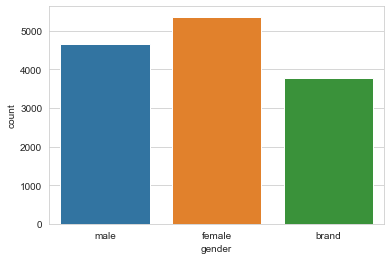

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sb.countplot(dt['gender'],label="Gender")

#Create a bar plot to visualize the amount of favorites and retweets

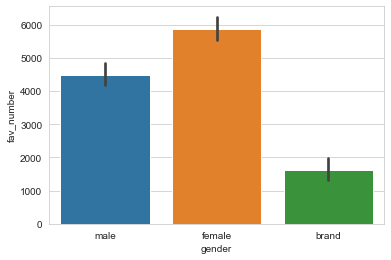

In [ ]:
sb.barplot (x = 'gender', y = 'fav_number',data = dt)

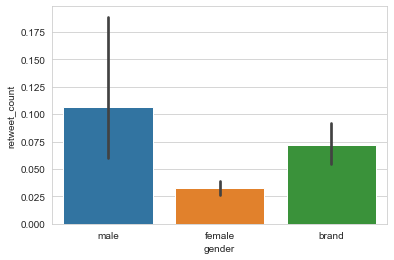

In [ ]:
sb.barplot (x ='gender', y = 'retweet_count',data = dt)

Visualize Colors attribute

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


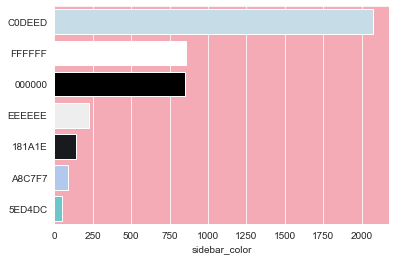

In [ ]:
male_top_sidebar_color = dt[dt['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color, palette=list(map(l, male_top_color)))

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366']


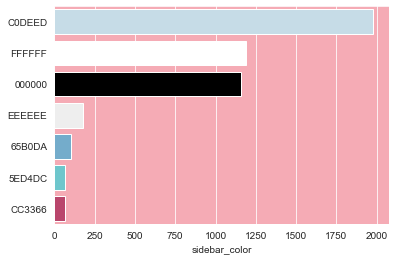

In [ ]:
female_top_sidebar_color = dt[dt['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color)))

For sidebar color, the top 3 colors of both male and female are the same
It is shown that the number of 2nd and 3rd color of female is larger but this can be explained by the fact that the 
number of female users are more than male.
So, at this point, sidebar_color may not give me any useful information for classifying gender.

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' 'ABB8C2']


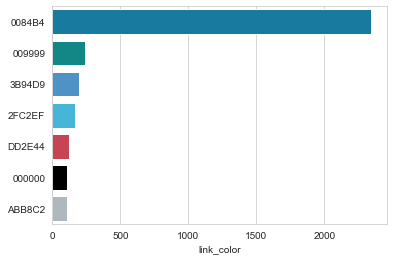

In [ ]:
male_top_link_color = dt[dt['gender'] == 'male']['link_color'].value_counts().head(7)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_top_link_color, y = male_top_link_color_idx, palette=list(map(l, male_top_color)))

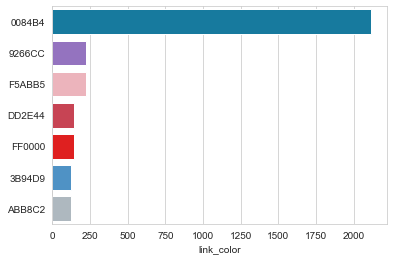

In [ ]:
female_top_link_color = dt[dt['gender'] == 'female']['link_color'].value_counts().head(7)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_top_link_color, y = female_top_link_color_idx, palette=list(map(l, female_top_color)))

In [ ]:
Most common 

In [ ]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

dt['tweets'] = [cleaning(s) for s in dt['text']]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
dt['tweets'] = dt['tweets'].str.lower().str.split()
dt['tweets'] = dt['tweets'].apply(lambda x : [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Male = dt[dt['gender'] == 'male']
Female = dt[dt['gender'] == 'female']
Brand = dt[dt['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

In [ ]:
Female_Words

'ù',         884
'like',      320
'get',       271
'one',       216
'day',       214
'ù']         206
'go',        188
'love',      184
'û',         180
'âù',        169
'time',      160
'amp',       155
'people',    153
'ü',         138
'got',       136
'know',      133
'new',       124
'best',      124
'back',      122
'still',     121
dtype: int64

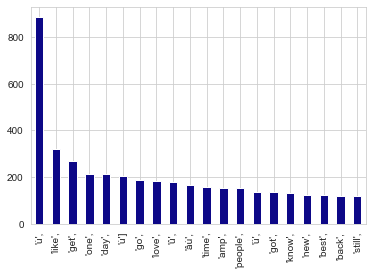

In [ ]:
#Getting a bargraph of most frequently used words by females
Female_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [ ]:
Male_Words

'ù',         282
'like',      246
'get',       232
'û',         173
'time',      152
'one',       152
'new',       146
'go',        134
'love',      125
'people',    120
'back',      116
'good',      114
'amp',       113
'see',       113
'know',      107
'got',       103
'think',     103
'best',      102
'make',      101
'day',       100
dtype: int64

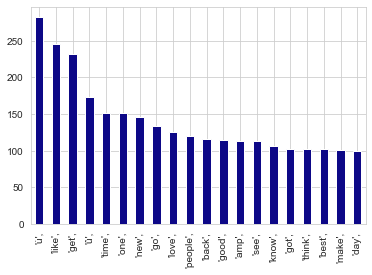

In [ ]:
#Bar graph to deduce the most frequently used words by males
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [ ]:
print("Most used brand words:")
Brand_words

Most used brand words:


'weather',    1078
['get',        553
'updates',     542
'channel']     537
'û',           304
'amp',         145
'new',         139
'us',          131
'get',         103
'via',          86
dtype: int64

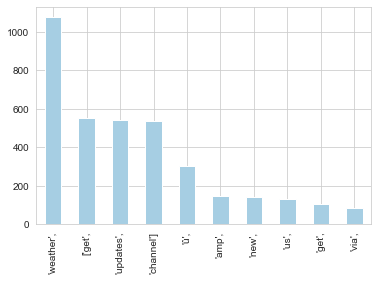

In [ ]:
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')

In [ ]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=stopwords.words('English')
cleanText=[]
cleanDescp=[]
for i in range(dt.shape[0]):
    current_message=dt['text'].values[i]
    tok=word_tokenize(current_message)
    cleanmsg=''
    for word in tok:
        if word not in stop_words:
            cleanmsg=cleanmsg+word+' '
    cleanText.append(cleanmsg)

In [ ]:
cleanText

['Robbie E Responds To Critics After Win Against Eddie Edwards In The # WorldTitleSeries https : //t.co/NSybBmVjKZ ',
 '\x89ÛÏIt felt like friends I living story them\x89Û\x9d https : //t.co/arngE0YHNO # retired # IAN1 https : //t.co/CIzCANPQFz ',
 "Hi @ JordanSpieth - Looking url - use @ IFTTT ? ! Do n't typically see advanced user @ PGATOUR ! https : //t.co/H68ou5PE9L ",
 'Watching Neighbours Sky+ catching Neighbs ! ! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù\x8fÈ_ÙÔ\x8d_Ù\x8fÈ Xxx ',
 'Ive seen people train lamps , chairs , tvs etc https : //t.co/w6zf4pVM4I ',
 '@ BpackEngineer Thank patience take care issue ! ',
 "Gala Bingo clubs bought å£241m : The UK 's largest High Street bingo operator , Gala , taken by\x89Û_ https : //t.co/HzeeykJUd3 ",
 '@ _Aphmau_ pic defines mcd fangirls/fanboys mcd shippers xD ',
 '@ Evielady lovely tree year ! Never seen gorgeous # Autumn # colour ',
 'MTG Deals 1x Rank-Up-Magic - The Seventh One - PRIO-EN058 - Secret Rare - Unlimi https : //t.co/Y22wyLpgnN https : //t.co/

In [ ]:
dt['cleanText']=cleanText

In [ ]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

dt['cleanText'] = [cleaning(s) for s in dt['cleanText']]

In [ ]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text


In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(dt['gender'])
# split the dataset in train and test
X = dt['cleanText']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

In [ ]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5835345243843554
Confusion matrix:
 [[ 830  141  165]
 [ 218 1036  356]
 [ 247  598  551]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.73      0.68      1136
           1       0.58      0.64      0.61      1610
           2       0.51      0.39      0.45      1396

    accuracy                           0.58      4142
   macro avg       0.58      0.59      0.58      4142
weighted avg       0.58      0.58      0.58      4142



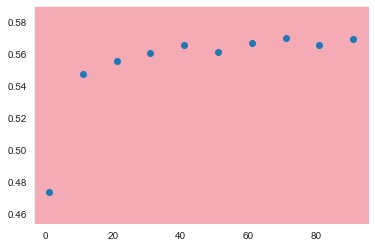

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Plot the correlation between n_estimators and accuracy
n = range (1,100,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)

In [ ]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5627716079188798
Confusion matrix:
 [[ 729  240  167]
 [ 154 1118  338]
 [ 198  714  484]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66      1136
           1       0.54      0.69      0.61      1610
           2       0.49      0.35      0.41      1396

    accuracy                           0.56      4142
   macro avg       0.57      0.56      0.56      4142
weighted avg       0.56      0.56      0.55      4142



In [ ]:
from sklearn.svm import SVC
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5816030902945437
Confusion matrix:
 [[833 137 166]
 [241 984 385]
 [248 556 592]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      1136
           1       0.59      0.61      0.60      1610
           2       0.52      0.42      0.47      1396

    accuracy                           0.58      4142
   macro avg       0.58      0.59      0.58      4142
weighted avg       0.58      0.58      0.58      4142



# Adding content of Description into Text

In [ ]:
#Fill NaN with empty string
dt.fillna("", inplace = True)
# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
dt['text_description'] = dt['cleanText'].str.cat(dt['description'], sep=' ')

dt['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13804
Name: text_description, dtype: int64

In [ ]:
# split the dataset in train and test
X = dt['text_description']
y=dt['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set
X_train.isnull().values.any() # Check if any null values, True if there is at least one.

False

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6815548044422984
Confusion matrix:
 [[ 948   81  107]
 [ 118 1184  308]
 [ 171  534  691]]
Classification report:
               precision    recall  f1-score   support

       brand       0.77      0.83      0.80      1136
      female       0.66      0.74      0.69      1610
        male       0.62      0.49      0.55      1396

    accuracy                           0.68      4142
   macro avg       0.68      0.69      0.68      4142
weighted avg       0.68      0.68      0.68      4142



# **Random Forest Classifier**

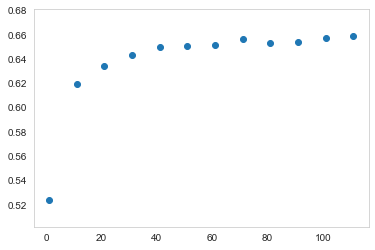

In [ ]:
n = range (1,120,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

It is shown that with approximately 80 trees, Random Forest classifier starts reaching the highest performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6549975857073878
Confusion matrix:
 [[ 871  178   87]
 [  80 1336  194]
 [ 118  772  506]]
Classification report:
               precision    recall  f1-score   support

       brand       0.81      0.77      0.79      1136
      female       0.58      0.83      0.69      1610
        male       0.64      0.36      0.46      1396

    accuracy                           0.65      4142
   macro avg       0.68      0.65      0.65      4142
weighted avg       0.67      0.65      0.64      4142



# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6791405118300338
Confusion matrix:
 [[ 940   82  114]
 [ 106 1139  365]
 [ 164  498  734]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1136
           1       0.66      0.71      0.68      1610
           2       0.61      0.53      0.56      1396

    accuracy                           0.68      4142
   macro avg       0.68      0.69      0.68      4142
weighted avg       0.67      0.68      0.68      4142



Experimental Results
Accuracy:

Logistic Regression: 68.15%; 
Random Forest: 65.49%;
SVM: 67.9%;
Best model:Logistic Regresssion model

# Ensemble technique - Take advantage of all 3 models

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 80, random_state=0)
clf3 = SVC(kernel = 'linear',probability = True, random_state=0)

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(X_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6895803183791607
Confusion matrix:
 [[ 952   87   97]
 [ 126 1241  245]
 [ 163  569  666]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1136
           1       0.65      0.77      0.71      1612
           2       0.66      0.48      0.55      1398

    accuracy                           0.69      4146
   macro avg       0.69      0.69      0.69      4146
weighted avg       0.69      0.69      0.68      4146

